In [744]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [344]:
def show_img_and_label(img,label,pred_label):
    img = np.array(img);
    plt.title("Label: "+str(label)+",predicted: "+str(pred_label));
    plt.imshow(img.reshape(28,28),cmap='gray',vmin=0, vmax=255)

In [345]:
def show_image(array):
    array = np.array(array);
    label = array[0];
    img = np.delete(array,0);
    plt.title("Label: "+str(label));
    plt.imshow(img.reshape(28,28),cmap='gray',vmin=0, vmax=255)

In [3]:
df = pd.read_csv('./data/train.csv');

Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
corr_matrix = df.corr()
corr_matrix['label'].sort_values(ascending = False)

label       1.000000
pixel381    0.431506
pixel409    0.423767
pixel436    0.420922
pixel408    0.413855
              ...   
pixel760         NaN
pixel780         NaN
pixel781         NaN
pixel782         NaN
pixel783         NaN
Name: label, Length: 785, dtype: float64

Sklearn Train

In [727]:
X = df.drop(['label'], axis=1)

In [728]:
y = df['label']

In [729]:
scaler = StandardScaler()

In [736]:
X=scaler.transform(X)

In [739]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.1, random_state=42)

In [740]:
X_train.shape

(37800, 784)

In [741]:
X_test.shape

(4200, 784)

In [767]:
clf = LogisticRegression(max_iter =10000).fit(X_train, y_train)

In [768]:
clf.coef_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [769]:
predicted = clf.predict(X_test)

In [770]:
delta =(predicted == y_test)

In [771]:
unique, counts = np.unique(y_test[~delta], return_counts=True)
print("Failed to predict numbers:",dict(zip(unique, counts)))

Failed to predict numbers: {0: 17, 1: 15, 2: 55, 3: 67, 4: 38, 5: 47, 6: 28, 7: 41, 8: 51, 9: 48}


In [772]:
clf.score(X_train,y_train)

0.9551058201058201

In [773]:
clf.score(X_test,y_test)

0.9030952380952381

In [774]:
accuracy_score(y_test,predicted)

0.9030952380952381

Custom

In [638]:
def normalize(X):
    mean = np.mean(X,axis=0);
    std = np.std(X,axis=0);
    std[std < 0.001] =1
    X_new = (X-mean)/std;
    return X_new, mean, std

In [639]:
def normalize_(X,mean,std):
    X_new = (X-mean)/std;
    return X_new

In [567]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.column_stack((ones, X))
    return X_new

In [568]:
def sigmoid(z):
    #z - вектор стовпець
    g = 1/(1+np.exp(z*-1));
    return g

In [569]:
def h(X, theta):
    # X - матриця
    # theta - вектор
    z = X.dot(theta)
    #print('z max: ',max(z))
    #print('z min: ',max(z))
    return sigmoid(z)

In [570]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m ==0:
        return None
    temp =h(X,theta);
    J = sum(-1*y*np.log(temp) + (1-y)*np.log(1-temp) )/m;
    return J

In [571]:
def derivative_theta(X, y, theta):
    m = X.shape[0];
    if m == 0:
        return None

    d_theta = X_new.T.dot(h(X_new,theta) -y_new)/m;
    
    return d_theta

In [572]:
def gradient_descent(X, y, theta, alpha, epsilon, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    
    J = cost_function(X,y,theta);
    
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        theta -= alpha* derivative_theta(X,y,theta);
        #print('max in theta: ',max(theta))
        #print('min in theta: ',min(theta))
        J = cost_function(X,y,theta);
        
        J_history.append(J)
        
        if i % 1000 == 0 and print_J == True:
            print(J)
        
        if abs(J-J_history[-2]) < epsilon:
            break
            
    return theta, J_history

In [640]:
def predict(X, mean, std, models,labels):
    
    X_new =normalize_(X,mean,std);
    X_new = prepare_X(X_new);
    predictions = [];
    for theta in models:
        predictions.append(h(X_new,theta))
    
    predict =[];
    for p in range(0,len(predictions[0])):
        max = abs(predictions[0][p]);
        max_label  =labels[0];
        for l in range(1,len(labels)):
            if(abs(predictions[l][p]) > max):
                max = abs(predictions[l][p]);
                max_label  =labels[l];
        predict.append(max_label);
    return predict

In [816]:
X = df.drop(['label'], axis=1)

In [817]:
y = df['label']

In [818]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.1, random_state=42)

In [650]:
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(37800, 784), y=(37800,)


In [651]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='error')

In [652]:
enc.fit(np.array(y).reshape(-1,1))

OneHotEncoder()

In [653]:
enc.categories_

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)]

In [654]:
y_train_encoded  = enc.transform(np.array(y_train).reshape(-1,1)).toarray()

In [655]:
models =[]

In [656]:
X_new,mean,std = normalize(X_train)

In [657]:
X_new = prepare_X(X_new)

In [659]:
for m in [0,1,2,3,4,5,6,7,8,9]:
    theta = np.zeros((X_new.shape[1], 1))
    y_new =y_train_encoded[:,m].reshape((X_train.shape[0], 1))
    new_theta, Js = gradient_descent(X_new, y_new, theta, 0.01, 1e-7, 10000, False)
    print("Cost for label ",m," is ",cost_function(X_new, y_new, theta))
    models.append(theta)

Cost for label  0  is  [-0.01061351]
Cost for label  1  is  [-0.01197881]
Cost for label  2  is  [0.00321339]
Cost for label  3  is  [0.00457665]
Cost for label  4  is  [-0.00824911]
Cost for label  5  is  [0.00600602]
Cost for label  6  is  [-0.00805266]
Cost for label  7  is  [-0.00552022]
Cost for label  8  is  [0.01162446]
Cost for label  9  is  [0.00034948]


In [714]:
y_train_pred=predict(X_train,mean,std,models,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [743]:
accuracy_score(y_train, y_train_pred)

0.9103174603174603

In [819]:
y_test_pred =predict(X_test,mean,std,models,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [820]:
delta =((y_test == y_test_pred))

In [821]:
delta[delta == False]

31803    False
30639    False
3220     False
36782    False
36490    False
         ...  
12441    False
34264    False
19671    False
20250    False
25795    False
Name: label, Length: 440, dtype: bool

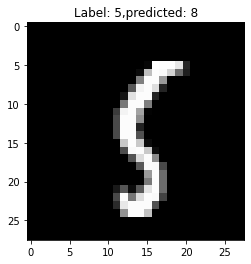

In [823]:
index =20250;
y_pred_lable = y_test_pred[y_pred.index == index]
show_img_and_label(X.iloc[index],y.iloc[index],y_pred_lable)

In [824]:
accuracy_score(y_test, y_test_pred)

0.8952380952380953

In [785]:
#save custom train models
np.savez('testnp', models)

In [791]:
to_load =np.load('testnp.npz')

In [793]:
to_load.files

['arr_0']

In [811]:
loaded_models=[to_load['arr_0']]